In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from linear_regression import LinearRegression
import scipy.stats as stats
from scipy.special import erfinv
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv", delimiter=";")
X = df["Angle"]
y = df["Distance"]

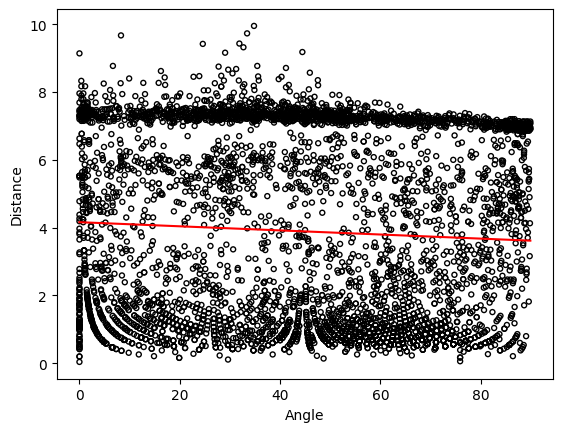

In [26]:
lr = LinearRegression()
lr.build(X, y)
b = lr.betas
plt.scatter(X, y, marker="o", facecolor="none", edgecolors="black", s=13)
space = np.linspace(np.min(X), np.max(X))
Y = b[0]*space + b[1]
plt.plot(space, Y, color="r")
plt.xlabel("Angle")
plt.ylabel("Distance")
plt.savefig("linear_regression.png", bbox_inches="tight")

# QUANTILE RESIDUALS

0   -2.984035
1   -2.970870
2    3.372999
3   -0.031571
4    3.225849
5   -2.703824
6   -3.300207
7   -3.180674
8   -2.872305
9   -3.170238
Name: Distance, dtype: float64
2.7659000521483343


((array([-3.63692208, -3.40167743, -3.27202625, ...,  3.27202625,
          3.40167743,  3.63692208]),
  array([-1.49002939, -1.43218204, -1.43218204, ...,  2.00979246,
          2.08654492,  2.16910741])),
 (0.9208885491939715, 5.014128764360999e-16, 0.9202767920847318))

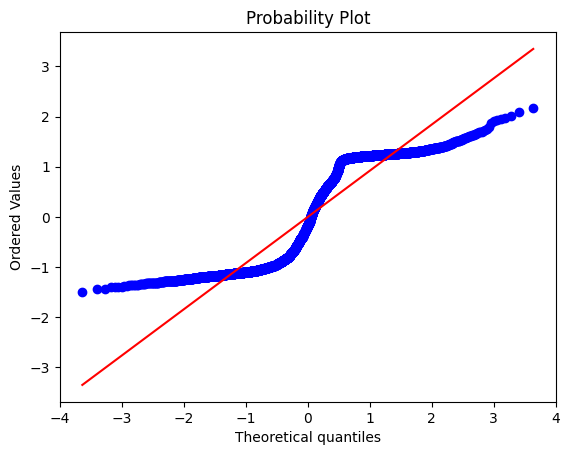

In [ ]:
predictions = lr.predict(X)
residuals = y - predictions
s = np.std(residuals)
print(s)
quantile_residuals = residuals/s
fig, ax = plt.subplots()
stats.probplot(quantile_residuals, plot=ax)

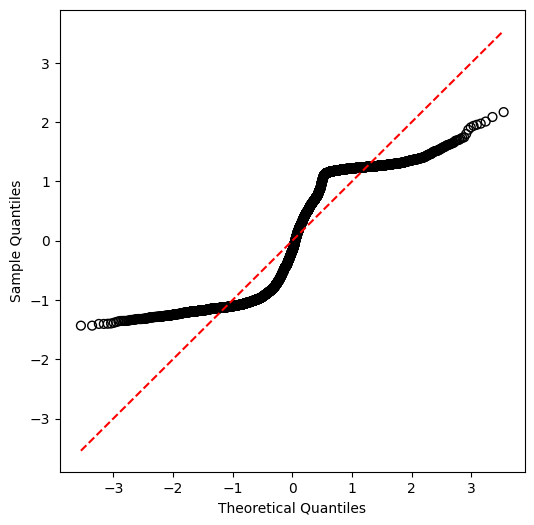

In [ ]:
predictions = lr.predict(X)
residuals = y - predictions
quantile_residuals = residuals/s
sorted_residuals = np.sort(quantile_residuals)
n = len(sorted_residuals)
probabilities = (np.arange(0, n)) / n
theoretical_quantiles = np.sqrt(2) * erfinv(2 * probabilities - 1)
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sorted_residuals, edgecolor='black', facecolor="none", marker="o", s=40)
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle="--")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.savefig("qqplot", bbox_inches="tight")

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  5.,  0.,
         1.,  1.,  2.,  2.,  1.,  1.,  0.,  8.,  5.,  0.,  4.,  0.,  1.,
         1.,  3.,  6.,  8., 10.,  0.,  9.,  2.,  7., 10.,  7.,  2.,  7.,
         3.,  5.,  8.,  9., 13.,  6.,  2.,  2.,  7., 14., 10.,  8.,  9.,
        10.,  3., 11., 30., 25.,  4.,  9., 10., 16., 48.,  8., 21., 10.,
        12., 21., 51., 18., 25., 14., 30.,  6., 76., 23., 14., 24., 20.,
        16., 47., 34., 26., 23., 11., 36., 26., 42., 10., 12.,  7., 29.,
        27., 15., 12.,  5., 11., 37., 24., 15.,  9., 10., 19., 20., 21.,
        14., 13.,  7., 20., 24., 23.,  7., 15., 10., 16., 17., 15., 18.,
         7., 15.,  9., 11., 12.,  4., 17.,  7., 13.,  7.,  2., 10., 11.,
         5., 17.,  9.,  7.,  9., 12.,  8.,  9.,  8.,  5., 12., 10.,  5.,
        10.,  6.,  8.,  9., 10.,  6.,  9.,  5., 10.

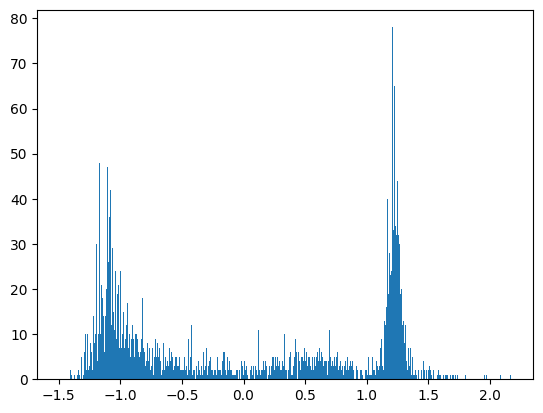

In [43]:
plt.hist(sorted_residuals, bins=1000)

In [22]:
import scipy
kurtosis = scipy.stats.kurtosis(sorted_residuals)
print(kurtosis)

-1.6751172485177217


# Residuals vs fitted values

2.7667262283161547 2.7659000521483343


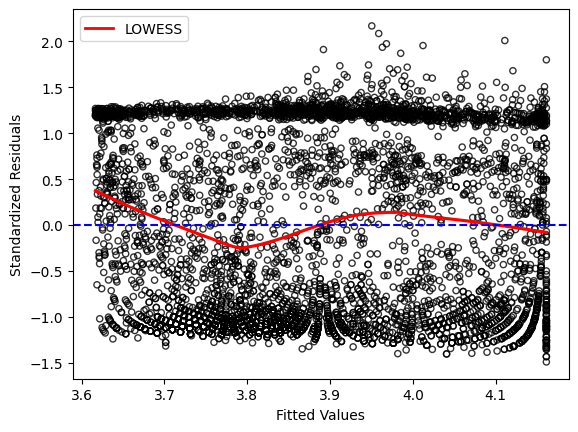

In [ ]:
from matplotlib.lines import Line2D
predictions = lr.predict(X)
residuals = y - predictions
sigma_hat = np.sqrt(np.sum(residuals**2) / (n - 2 - 1))
std = np.std(residuals)
print(sigma_hat, std)
pearson_residuals = residuals/sigma_hat
h = np.diag(lr.hat_matrix)
# r = quantile_residuals/np.sqrt((1-h))
standardized_residuals = residuals / (std*np.sqrt(1-h))
sns.regplot(x=predictions, y=standardized_residuals, lowess=True, scatter_kws={'s': 20, 'color':"black", "facecolor":"None"}, line_kws={'color': 'red'})
plt.axhline(0, c="blue", ls="--")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
lowess_line = Line2D([0], [0], color='red', lw=2, label='LOWESS')
plt.legend(handles=[lowess_line])
plt.savefig("homo.png", bbox_inches="tight")

# Implementing Cook's distance from the workbook (not the weirdly written chapter 8)

0     2.543991e-04
1     1.651236e-04
2     1.573458e-04
3     3.705729e-08
4     1.772170e-04
5     1.436715e-04
6     1.456806e-04
7     2.026243e-04
8     1.541996e-04
9     1.367769e-04
10    1.728018e-04
11    1.720465e-04
12    1.914524e-04
13    2.026243e-04
14    4.568119e-04
Name: Distance, dtype: float64


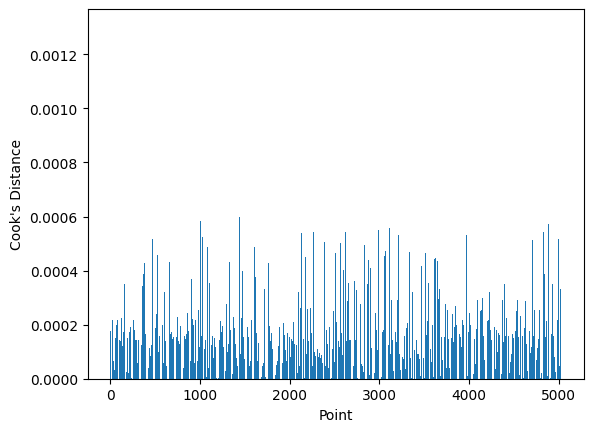

In [39]:
k = len(predictions)
MSE = np.sum(residuals**2)/k
h = np.diag(lr.hat_matrix)
D = (residuals**2 / (2*(MSE))) * (h / ((1 - h))**2)
print(D[0:15])
plt.bar(range(k), D)
plt.xlabel("Point")
plt.ylabel("Cook's Distance")
plt.savefig("cooks.png", bbox_inches="tight")

In [40]:
8/(5024 - 4)

0.0015936254980079682

In [9]:
max(D)

0.00130196148184772